In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from lifelines import CoxPHFitter
import sklearn
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

Data Prep

In [37]:
df = pd.read_csv("HW4data.csv")
df

,ID,lenfol,fstat,miord,bmi,year,age_c
0,1,2178,0,1,25.54051,1,4
1,2,2172,0,0,24.02398,1,1
2,3,2190,0,0,22.14290,1,3
3,4,297,1,0,26.63187,1,3
4,5,2131,0,0,24.41255,1,3
...,...,...,...,...,...,...,...
495,496,10,1,0,27.96454,3,3
496,497,662,0,0,24.26862,3,3
497,498,725,0,0,42.13576,3,1
498,499,532,0,0,27.40905,3,2


Feature Selection (xgboost with cox objective)

In [38]:
def xgb_fs_cox(df, time, event, model_features):
    # Since XGBoost only allow one column for y, the censoring information is coded as negative values
    df['y_xgb'] = np.where(df[event]==0, df[time]*-1, df[time])
    dv_list = ['y_xgb']
    df = df[dv_list + model_features]
    param_grid = {'max_depth': [3,6,15], 'learning_rate': [0.01,0.05,0.1,0.2,0.3], 'colsample_bytree':[0.4, 0.6, 0.8],
                  'n_estimators': [100,300], 'objective': ['survival:cox'], 'booster': ['gbtree'], 'random_state' : [42],
                  'eval_metric' : ['cox-nloglik'], 'gamma' : [0,1,5]}
    gs = sklearn.model_selection.GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid=param_grid,
            cv=3,  
            verbose=False,
            scoring='r2')
    x = df.drop(dv_list,axis=1)
    y = df[dv_list]
    fitted_model_xgb = gs.fit(x, y.values.ravel())
    imp = pd.concat([pd.DataFrame(x.columns).rename(columns={0:'Feature'}),
                     pd.DataFrame(fitted_model_xgb.best_estimator_.feature_importances_.tolist()).rename(columns={0:'Importance'})],axis=1).sort_values(['Importance'],ascending=False)
    explainer_xgb = shap.TreeExplainer(fitted_model_xgb.best_estimator_)
    shap_values_xgb = explainer_xgb.shap_values(x)
    shap.summary_plot(shap_values_xgb, x, max_display=x.shape[1],show=False)
    plt.savefig('FS_SHAP_PLOT.pdf',bbox_inches ="tight")
    return imp                                                    

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and incr

,Feature,Importance
2,age_c,0.399917
1,bmi,0.295996
0,miord,0.182210
3,year,0.121877


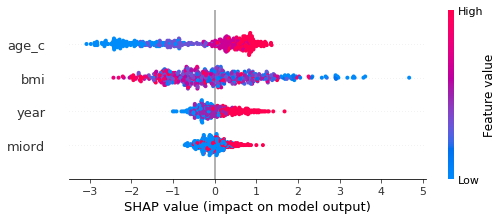

In [39]:
model_features = ['miord', 'bmi', 'age_c', 'year']
imp = xgb_fs_cox(df, 'lenfol', 'fstat', model_features)
imp

Select Top N

In [47]:
n = 5
best_n = imp.iloc[0:n, 0].values.tolist()
best_n

['age_c', 'bmi', 'miord', 'year']

Cox Model

In [54]:
time = ['lenfol']
event = ['fstat']
cph = CoxPHFitter()
cph.fit(df[best_n + time + event], 'lenfol', 'fstat')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 500 total observations, 285 right-censored observations>
             duration col = 'lenfol'
                event col = 'fstat'
      baseline estimation = breslow
   number of observations = 500
number of events observed = 215
   partial log-likelihood = -1155.54
         time fit was run = 2021-04-27 20:17:06 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age_c       0.62       1.86       0.08             0.47             0.77                 1.60                 2.15
bmi        -0.05       0.95       0.02            -0.08            -0.02                 0.92                 0.98
miord       0.16       1.18       0.14            -0.11             0.44                 0.90                 1.55
year        0.31       1.37       0.10             0.12             0.51                 1.13                 1.66

              z      p   -log2(p)
covariate                        
age_c      8.23 <0.005      52.26
bmi       -3.23 <0.005       9.67
miord      1.17   0.24       2.05
year       3.18 <0.005       9.43
---
Concordance = 0.73
Partial AIC = 2319.08
log-likelihood ratio test = 143.56 on 4 df
-log2(p) of ll-ratio test = 97.37

Survival Curves

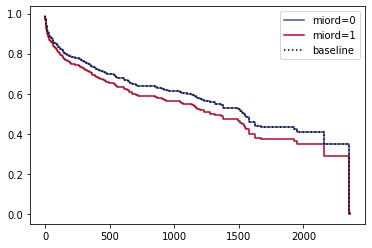

In [57]:
#cph.plot_partial_effects_on_outcome('age_c', values=[1,2,3,4], cmap='coolwarm')
cph.plot_partial_effects_on_outcome('miord', values=[0,1], cmap='coolwarm')

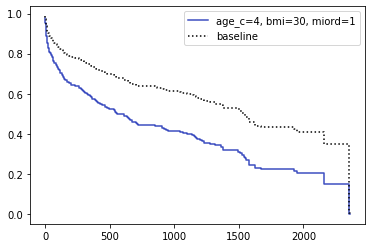

In [58]:
# get curve for new data
cph.plot_partial_effects_on_outcome(['age_c', 'bmi', 'miord'], values=[[4, 30, 1]], cmap='coolwarm')

Probabilities

In [64]:
prob_by_time = cph.predict_survival_function(df[best_n + time + event])
prob_by_time.reset_index().rename(columns={'index':'lenfol'})

,lenfol,0,1,2,3,4,5,6,7,8,...,490,491,492,493,494,495,496,497,498,499
0,1.0,9.778819e-01,0.996818,0.987996,0.990369,0.989260,0.988626,0.998515,0.997268,9.828616e-01,...,9.813656e-01,9.606122e-01,9.552924e-01,9.819432e-01,9.574508e-01,9.831970e-01,9.798705e-01,0.997564,0.990672,9.532799e-01
1,2.0,9.557155e-01,0.993567,0.975839,0.980591,0.978370,0.977100,0.996995,0.994474,9.655971e-01,...,9.626231e-01,9.218440e-01,9.115347e-01,9.637708e-01,9.157105e-01,9.662646e-01,9.596554e-01,0.995073,0.981200,9.076501e-01
2,3.0,9.473792e-01,0.992327,0.971233,0.976881,0.974241,0.972731,0.996415,0.993409,9.590809e-01,...,9.555567e-01,9.074478e-01,8.953498e-01,9.569165e-01,9.002469e-01,9.598722e-01,9.520421e-01,0.994123,0.977605,8.907979e-01
3,4.0,9.417769e-01,0.991489,0.968128,0.974377,0.971455,0.969785,0.996022,0.992689,9.546944e-01,...,9.508022e-01,8.978293e-01,8.845560e-01,9.523038e-01,8.899265e-01,9.555685e-01,9.469221e-01,0.993480,0.975178,8.795670e-01
4,5.0,9.361819e-01,0.990648,0.965018,0.971868,0.968665,0.966834,0.995628,0.991965,9.503078e-01,...,9.460495e-01,8.882689e-01,8.738431e-01,9.476921e-01,8.796773e-01,9.512643e-01,9.418062e-01,0.992835,0.972747,8.684265e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2190.0,1.771987e-01,0.781473,0.392820,0.472934,0.433687,0.412683,0.891389,0.809214,2.625029e-01,...,2.333204e-01,4.464244e-02,2.905012e-02,2.441868e-01,3.459258e-02,2.695251e-01,2.073581e-01,0.828044,0.484282,2.467666e-02
391,2192.0,1.771987e-01,0.781473,0.392820,0.472934,0.433687,0.412683,0.891389,0.809214,2.625029e-01,...,2.333204e-01,4.464244e-02,2.905012e-02,2.441868e-01,3.459258e-02,2.695251e-01,2.073581e-01,0.828044,0.484282,2.467666e-02
392,2350.0,1.592893e-02,0.554411,0.106964,0.166750,0.135539,0.120361,0.759544,0.602660,4.078188e-02,...,3.076327e-02,5.887913e-04,2.106598e-04,3.430241e-02,3.198839e-04,4.344042e-02,2.319943e-02,0.636751,0.176482,1.425832e-04
393,2353.0,1.755912e-04,0.291665,0.009379,0.023711,0.015380,0.012001,0.562968,0.347206,1.251326e-03,...,6.944056e-04,1.789335e-07,2.090440e-08,8.717722e-04,5.002547e-08,1.427785e-03,3.851275e-04,0.389500,0.026694,9.249905e-09


In [73]:
# get probabilities for new data by time
new_dat = pd.DataFrame([[1, 20, 2, 4, 1000, 0]], columns=['miord', 'bmi', 'age_c', 'year', 'lenfol', 'fstat'])
cph.predict_survival_function(new_dat)

,0
1.0,9.784714e-01
2.0,9.568825e-01
3.0,9.487600e-01
4.0,9.433002e-01
5.0,9.378467e-01
...,...
2190.0,1.856558e-01
2192.0,1.856558e-01
2350.0,1.780834e-02
2353.0,2.216580e-04


In [76]:
# probabilities given time already lived
cph.predict_survival_function(new_dat, conditional_after=[1000])

,0
1.0,9.999042e-01
2.0,9.998083e-01
3.0,9.997125e-01
4.0,9.996167e-01
5.0,9.995209e-01
...,...
2190.0,3.308778e-09
2192.0,3.308778e-09
2350.0,3.308778e-09
2353.0,3.308778e-09


In [77]:
# time of median 
#cph.predict_median(df[best_n + time + event])
print(cph.predict_median(new_dat))
print(cph.predict_median(new_dat, conditional_after=[1000]))

704.0
1157.0


In [80]:
# expected time to event
#cph.predict_expectation(df[best_n + time + event])
print(cph.predict_expectation(new_dat))
print(cph.predict_expectation(new_dat, conditional_after=[1000]))

0    988.605767
dtype: float64
0    864.924125
dtype: float64


In [81]:
# probability event will occur within X time given y amount of time lived

In [ ]:
# which combination of feature values yields the shortest time to event expectation

In [ ]:
# test on a hold out set that only contains events that have happened